In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("/kaggle/input/student-data/student_performance_analysis_dataset.csv")

#print(data.to_string())
#print(data.head())
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1000 non-null   object 
 1   Category               1000 non-null   object 
 2   Date                   1000 non-null   object 
 3   Test Score             1000 non-null   int64  
 4   Attendance Percentage  1000 non-null   float64
 5   Label                  1000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB
None


In [8]:
#******sumary***
print(data.describe())

#unique value in categorical culumns
print("Unique Categories:",data['Category'].unique())
print("Unique Cabels:",data['Label'].unique())

        Test Score  Attendance Percentage
count  1000.000000            1000.000000
mean    498.218000             249.764280
std     287.799477             141.420251
min       1.000000              10.100000
25%     249.000000             121.820000
50%     498.500000             244.810000
75%     749.000000             371.007500
max     998.000000             499.430000
Unique Categories: ['Type D' 'Type C' 'Type A' 'Type B']
Unique Cabels: ['Positive' 'Negative' 'Neutral']


In [9]:
#student avg
print("score avg",data['Test Score'].mean())

score avg 498.218


In [10]:
#duplicate rows 
data=data.drop_duplicates()
print(data)
#dateline formet
data['Date']=pd.to_datetime(data['Date'])




          ID Category        Date  Test Score  Attendance Percentage     Label
0       ID_1   Type D  2018-01-01         961                 346.70  Positive
1       ID_2   Type C  2018-01-02         541                  73.90  Positive
2       ID_3   Type A  2018-01-03         604                 419.44  Positive
3       ID_4   Type A  2018-01-04         280                 275.95  Negative
4       ID_5   Type B  2018-01-05         758                  20.69   Neutral
..       ...      ...         ...         ...                    ...       ...
995   ID_996   Type A  2020-09-22          29                 436.37  Negative
996   ID_997   Type D  2020-09-23         528                 261.66   Neutral
997   ID_998   Type B  2020-09-24         250                  40.85  Negative
998   ID_999   Type A  2020-09-25         560                 233.01  Positive
999  ID_1000   Type C  2020-09-26         914                 149.88   Neutral

[1000 rows x 6 columns]


In [12]:
# Total Score by categore
test_score_avg= data.groupby("Category")['Test Score'].mean()
print(test_score_avg)

#Attendance_Percentag
Attendance_Percentag_groupby_label=data.groupby('Label')['Attendance Percentage'].mean()
print(Attendance_Percentag_groupby_label)



Category
Type A    504.539924
Type B    479.061224
Type C    491.906383
Type D    515.782101
Name: Test Score, dtype: float64
Label
Negative    250.632476
Neutral     244.913372
Positive    253.935237
Name: Attendance Percentage, dtype: float64


In [13]:
#Monthly student performaens
data['Month']= data['Date'].dt.month
monthly_test_score= data.groupby('Month')['Test Score'].sum()
print(monthly_test_score)
 

Month
1     45988
2     40062
3     50107
4     42405
5     47825
6     43920
7     43000
8     48531
9     46967
10    30412
11    26611
12    32390
Name: Test Score, dtype: int64


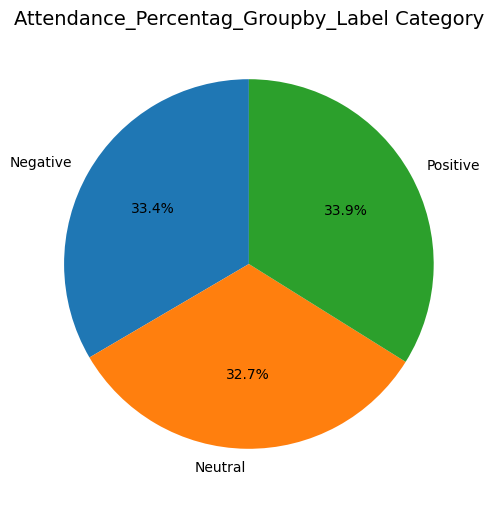

In [14]:
#visualitation

plt.figure(figsize=(8,6))
plt.pie(Attendance_Percentag_groupby_label.values,labels=Attendance_Percentag_groupby_label.index, autopct='%1.1f%%',startangle=90)
plt.title("Attendance_Percentag_Groupby_Label Category", fontsize=14)
plt.show()


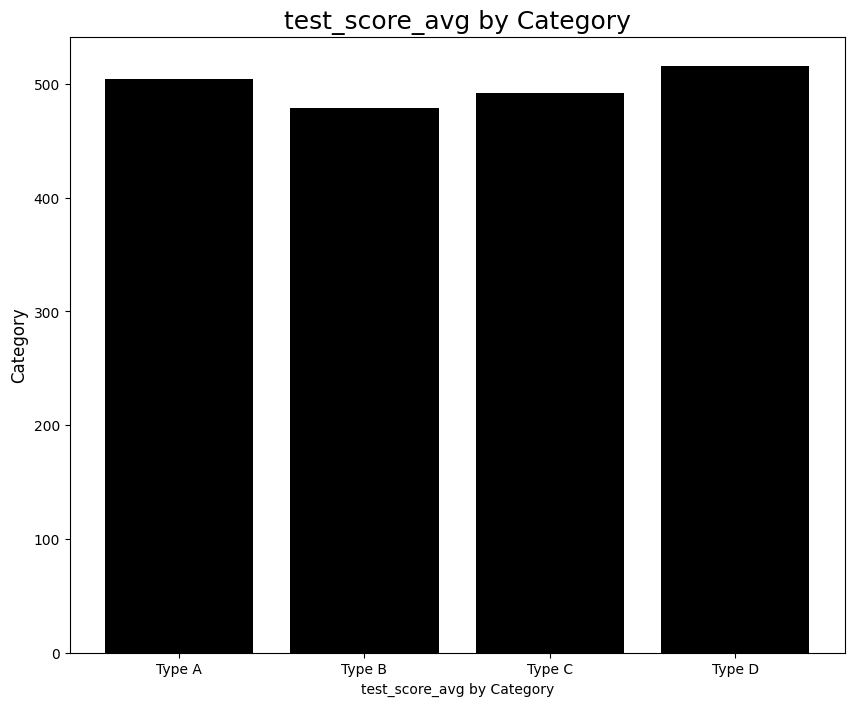

In [20]:
#ber2
plt.figure(figsize=(10,8))
plt.bar(test_score_avg.index, test_score_avg.values, color="black")
plt.title("test_score_avg by Category", fontsize=18)
plt.xlabel("test_score_avg by Category", fontsize=10)
plt.ylabel("Category", fontsize=12)
plt.show()

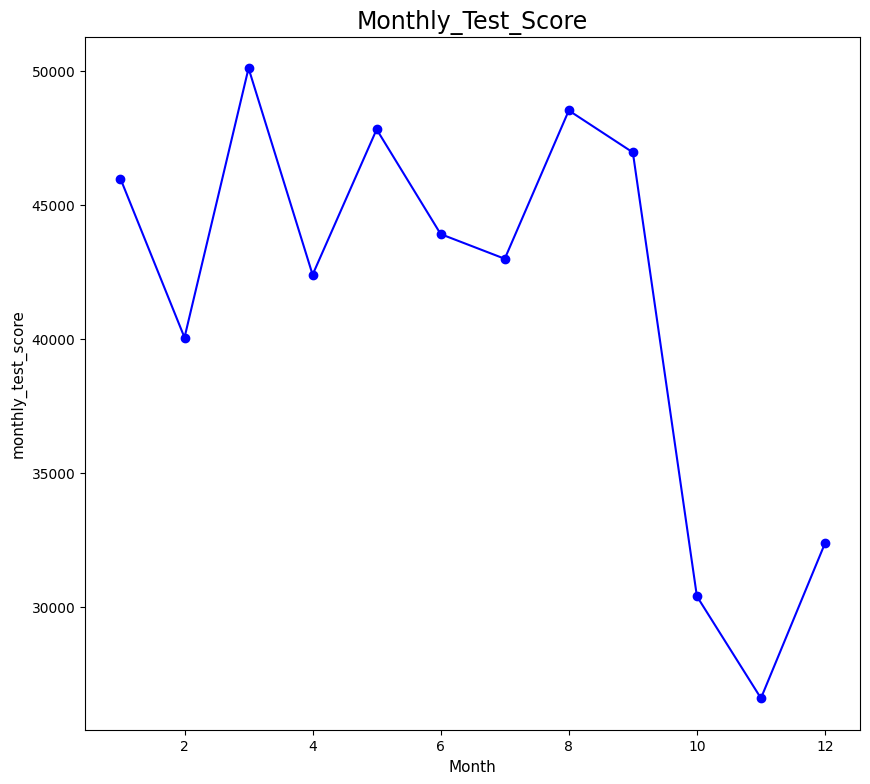

In [19]:
#plot chart
plt.figure(figsize=(10,9))
plt.plot(monthly_test_score.index, monthly_test_score.values,marker='o',color='blue')
plt.title("Monthly_Test_Score",fontsize=17)
plt.xlabel("Month",fontsize=11)
plt.ylabel("monthly_test_score",fontsize=11)
plt.show()